Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

1)R&D Spend -- Research and devolop spend in the past few years
2)Administration -- spend on administration in the past few years
3)Marketing Spend -- spend on Marketing in the past few years
4)State -- states from which data is collected
5)Profit  -- profit of each state in the past few years

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA Process

In [ ]:
# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# for null values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
# for duplicates
df.duplicated().sum()

0

In [ ]:
# rename the column names
df = df.rename({'R&D Spend':'RDS', 'Administration':'AD', 'Marketing Spend':'MS'},axis=1)
df.head()

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##Correlation Analysis
(For independent variables )

In [ ]:
df.corr()

,RDS,AD,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


##Scatterplot Between Variables along with Histogram

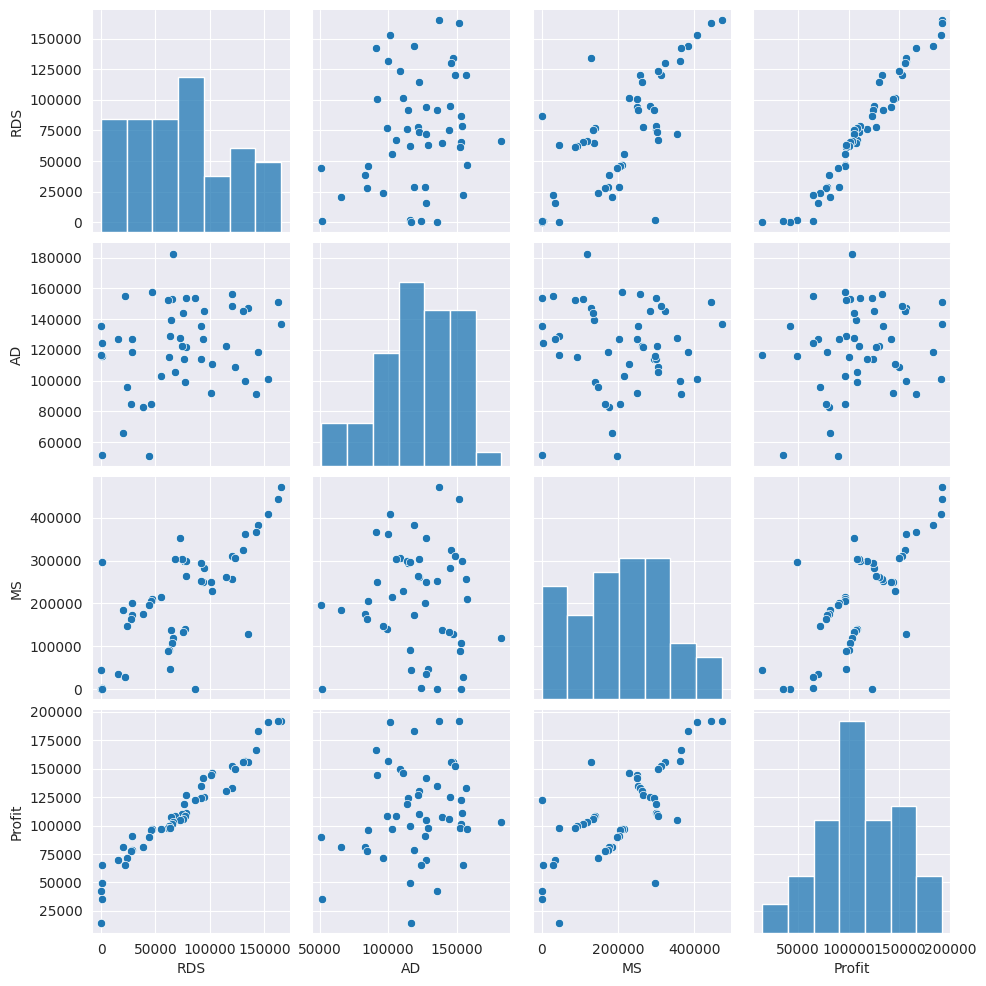

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

<Axes: >

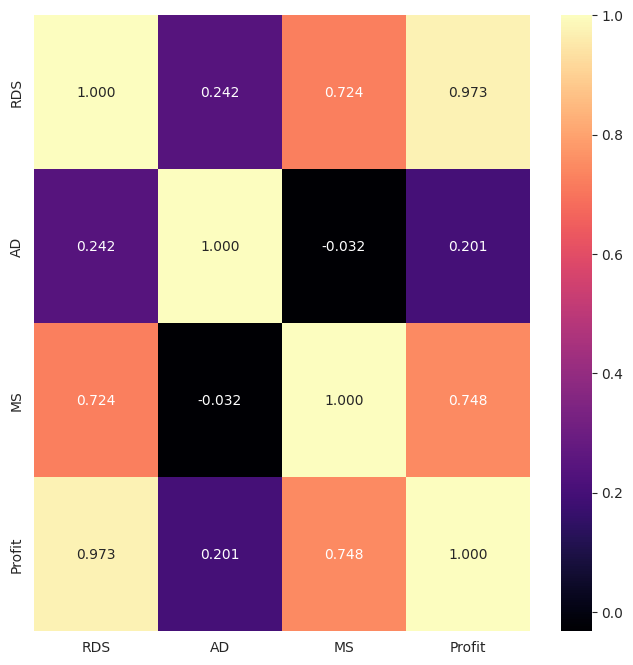

In [ ]:
fig, ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),cmap='magma', annot=True, fmt='.3f')

<Axes: xlabel='Profit', ylabel='RDS'>

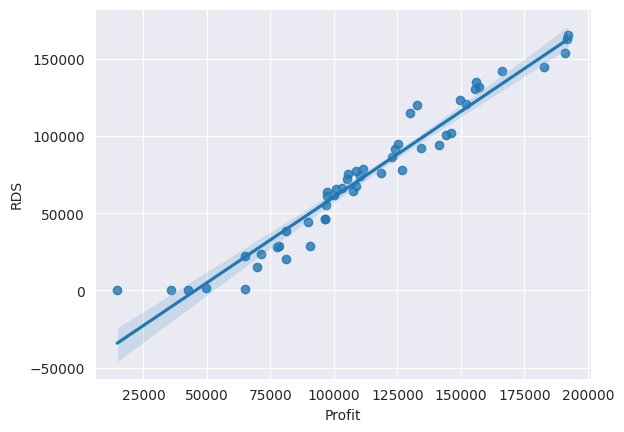

In [ ]:
sns.regplot(x ='Profit', y='RDS', data=df)

<Axes: xlabel='Profit', ylabel='AD'>

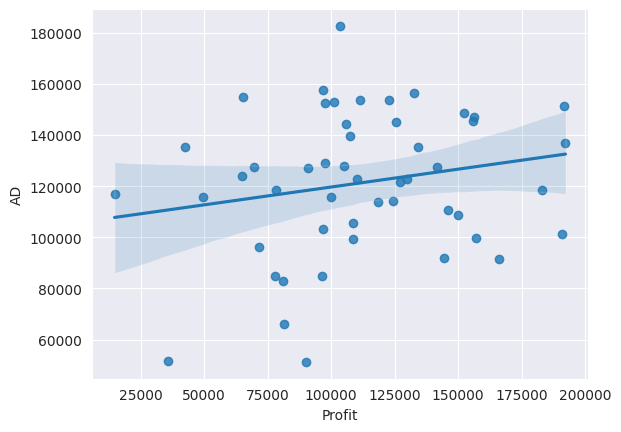

In [ ]:
sns.regplot(x = 'Profit', y = 'AD', data =df)

<Axes: xlabel='Profit', ylabel='MS'>

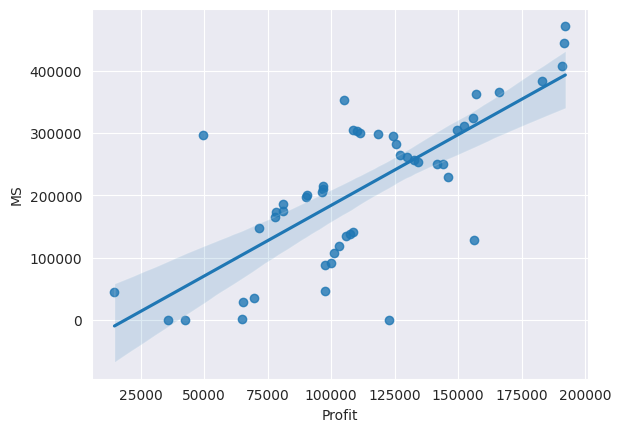

In [ ]:
sns.regplot(x = 'Profit', y = 'MS', data =df)

## Model Building

In [ ]:
model = smf.ols('Profit ~ RDS+AD+MS', data=df).fit()
model

## Model Testing

In [ ]:
# finding the p_values and t_values
print('*** t-values ***','\n',model.tvalues, '\n','*** p-values ***','\n', model.pvalues)

*** t-values *** 
 Intercept     7.626218
RDS          17.846374
AD           -0.525507
MS            1.655077
dtype: float64 
 *** p-values *** 
 Intercept    1.057379e-09
RDS          2.634968e-22
AD           6.017551e-01
MS           1.047168e-01
dtype: float64


In [ ]:
# Finding R-squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        10:35:14   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Simple Linear Regression Model**

Build Simple Linear Regression model and Multi Linear Regression Models for insignificance variables 'AD' and 'MS' . Also find their t_values and p_values

In [ ]:
df.columns

Index(['RDS', 'AD', 'MS', 'State', 'Profit'], dtype='object')

In [ ]:
slr_a=smf.ols('Profit~AD', data=df).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [ ]:
slr_m=smf.ols('Profit~MS', data=df).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

## Multi Linear Regression model

In [ ]:
mlr_am = smf.ols('Profit~AD+MS', data=df).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

## Model validation
calculating VIF = 1/(1-Rsquare) for all independent variables

Collinearity problem check

In [ ]:
rsq_r = smf.ols('RDS~AD+MS',data=df).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('AD~RDS+MS',data=df).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('MS~RDS+AD',data=df).fit().rsquared
vif_m = 1/(1-rsq_m)

# putting the values in DataFrame format
d1 = {'Variables':['RDS','AD','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,AD,1.175091
2,MS,2.326773


## Residual Model

Test for Normality of Residuals (Q-Q plot)

Text(0.5, 1.0, 'Normal Q-Q plot of Residuals')

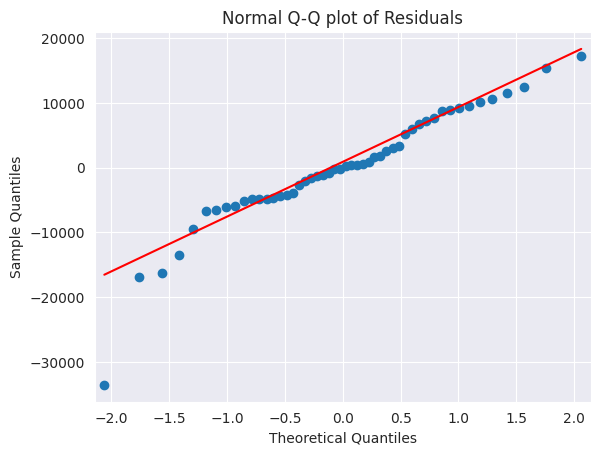

In [ ]:
import statsmodels.api as sm

sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of Residuals')

In [ ]:
list(np.where(model.resid<-30000))

[array([49])]

## **Residual Plot For Homoscedasticity : Constant Variance**

In [ ]:
def standard_values(vals):
  return (vals-vals.mean())/vals.std()

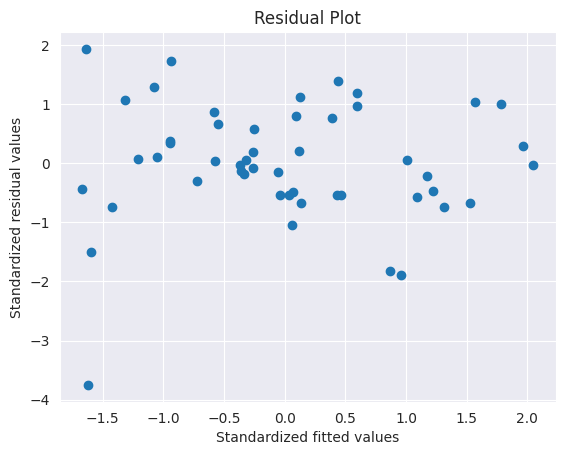

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## **To test for Errors (Residual Vs Regressor)**

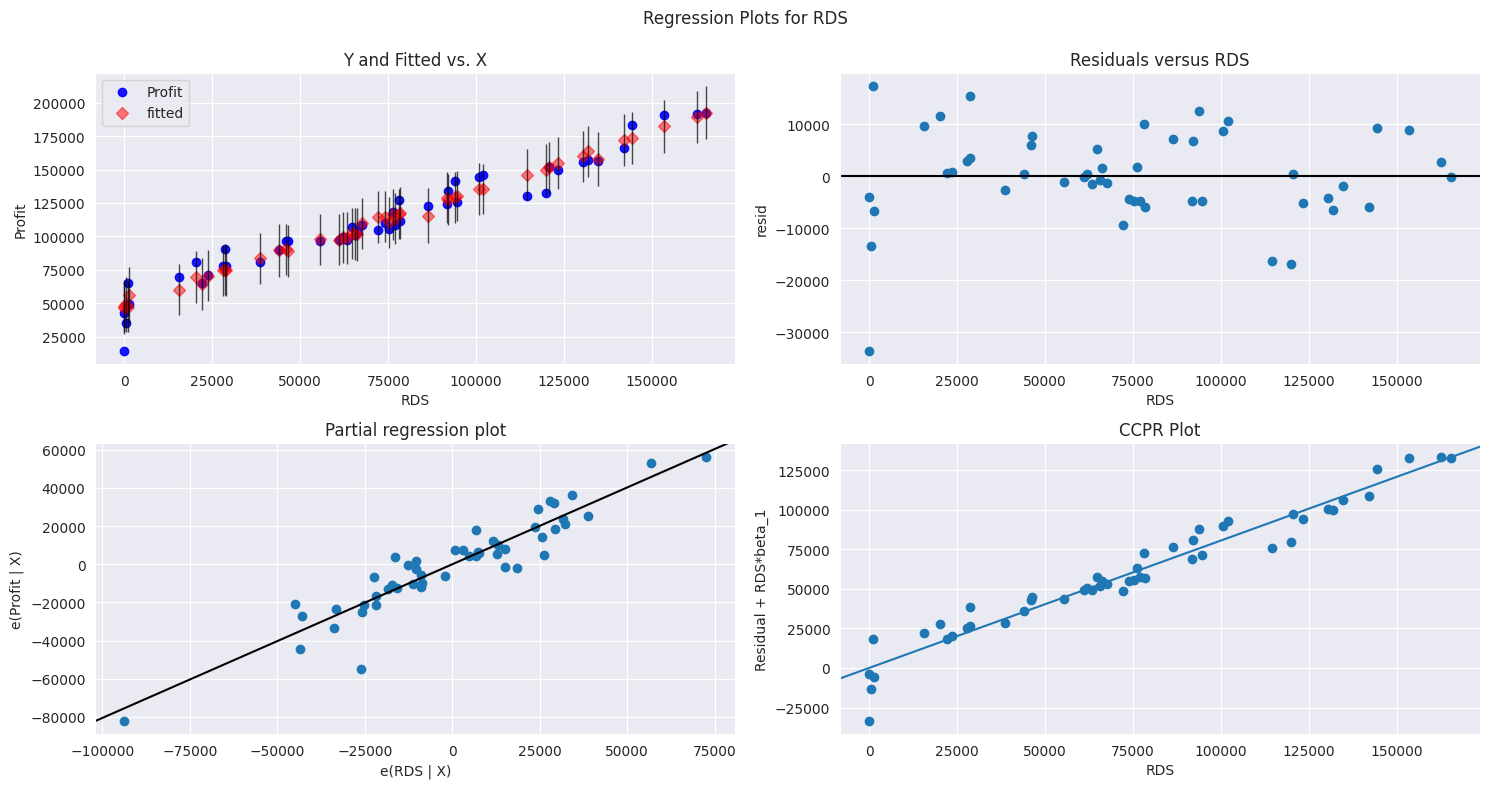

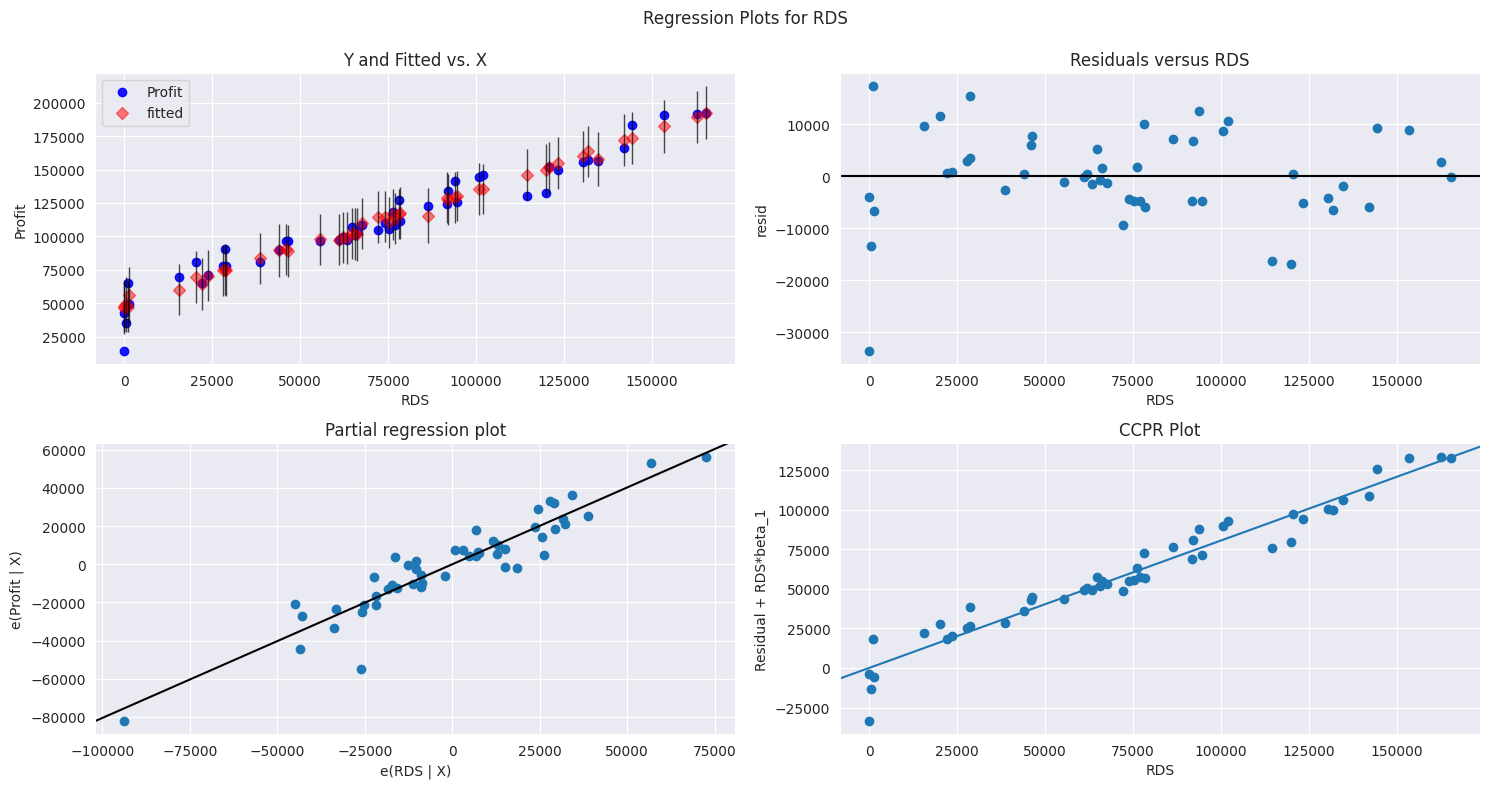

In [ ]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'RDS', fig=fig)

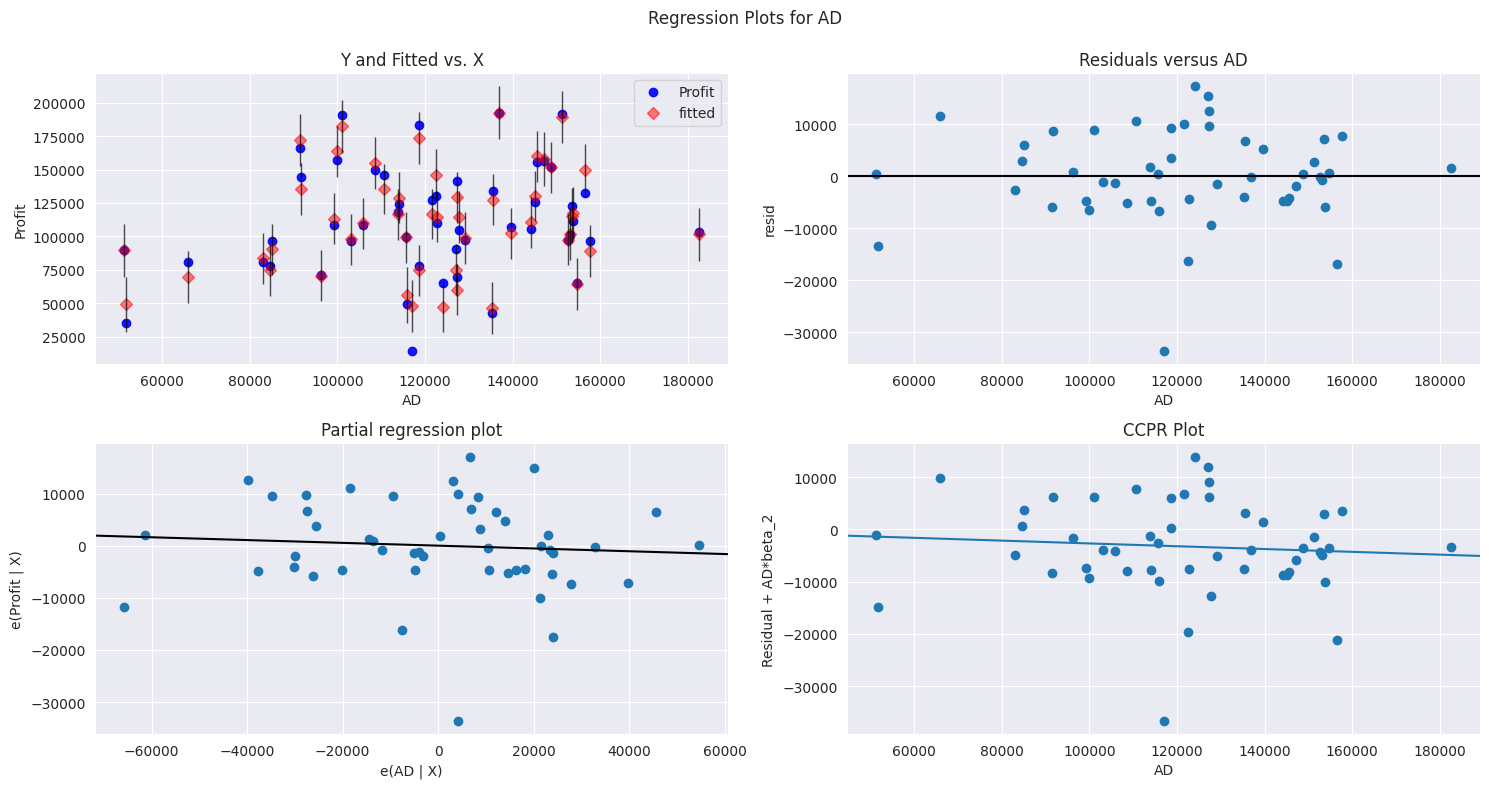

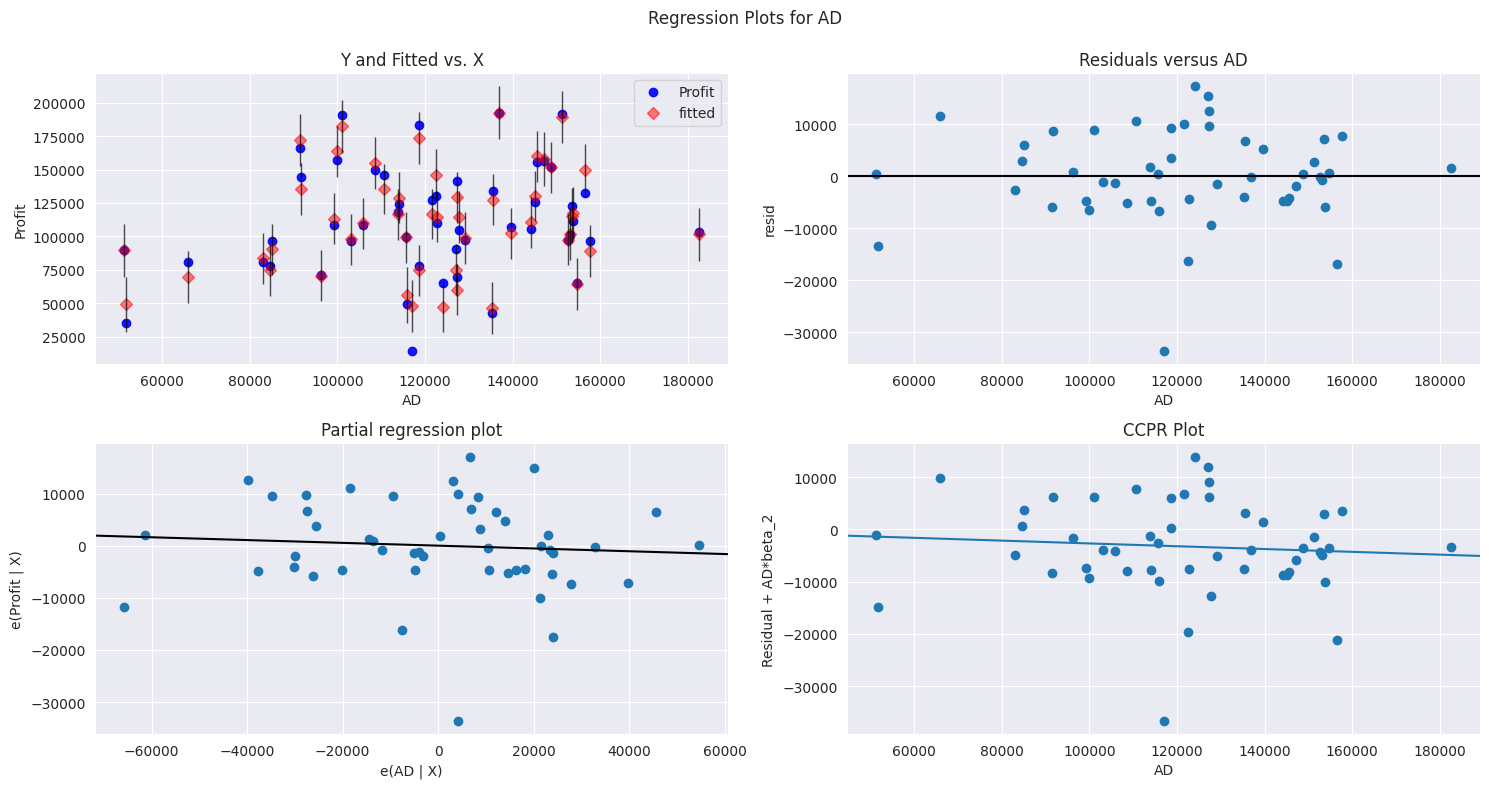

In [ ]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'AD', fig=fig)

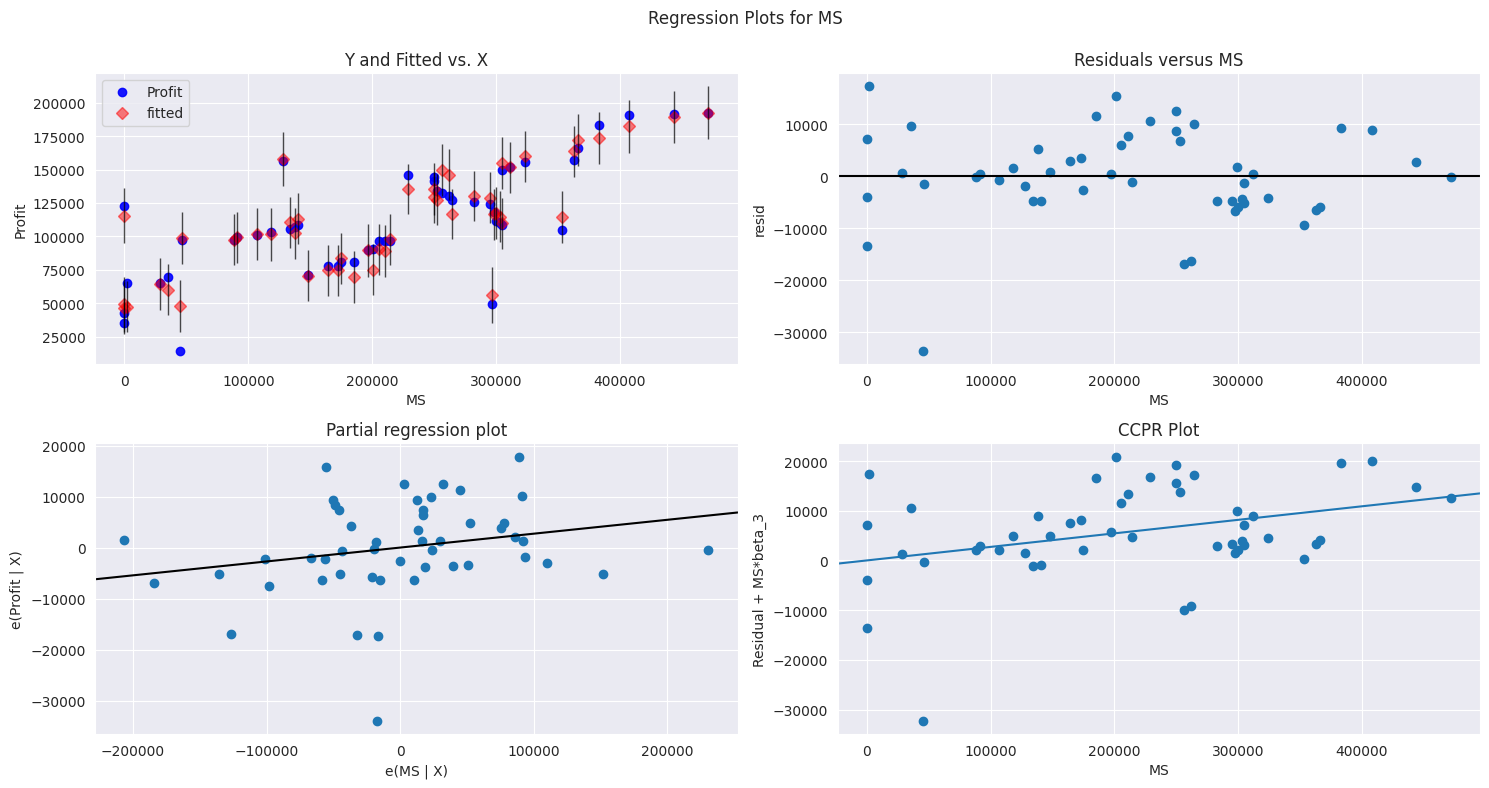

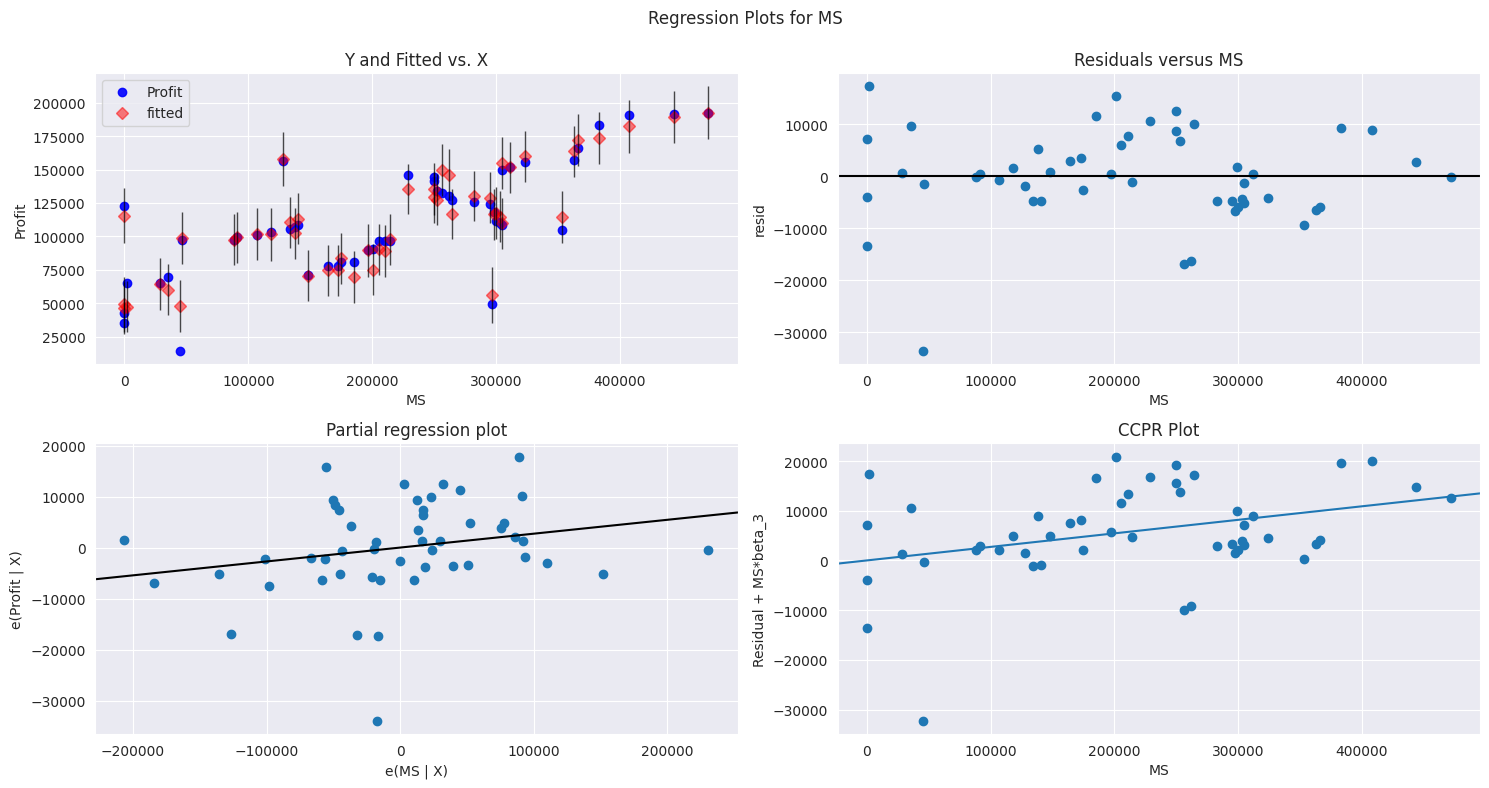

In [ ]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'MS', fig=fig)

## **Model Deletion Diagnostics**
## Detecting Influencers or Outliers
## 1) Cook's Distance

In [ ]:
# If Cook's distance > 1 , then it is an outlier
(c,_) = model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<function matplotlib.pyplot.show(close=None, block=None)>

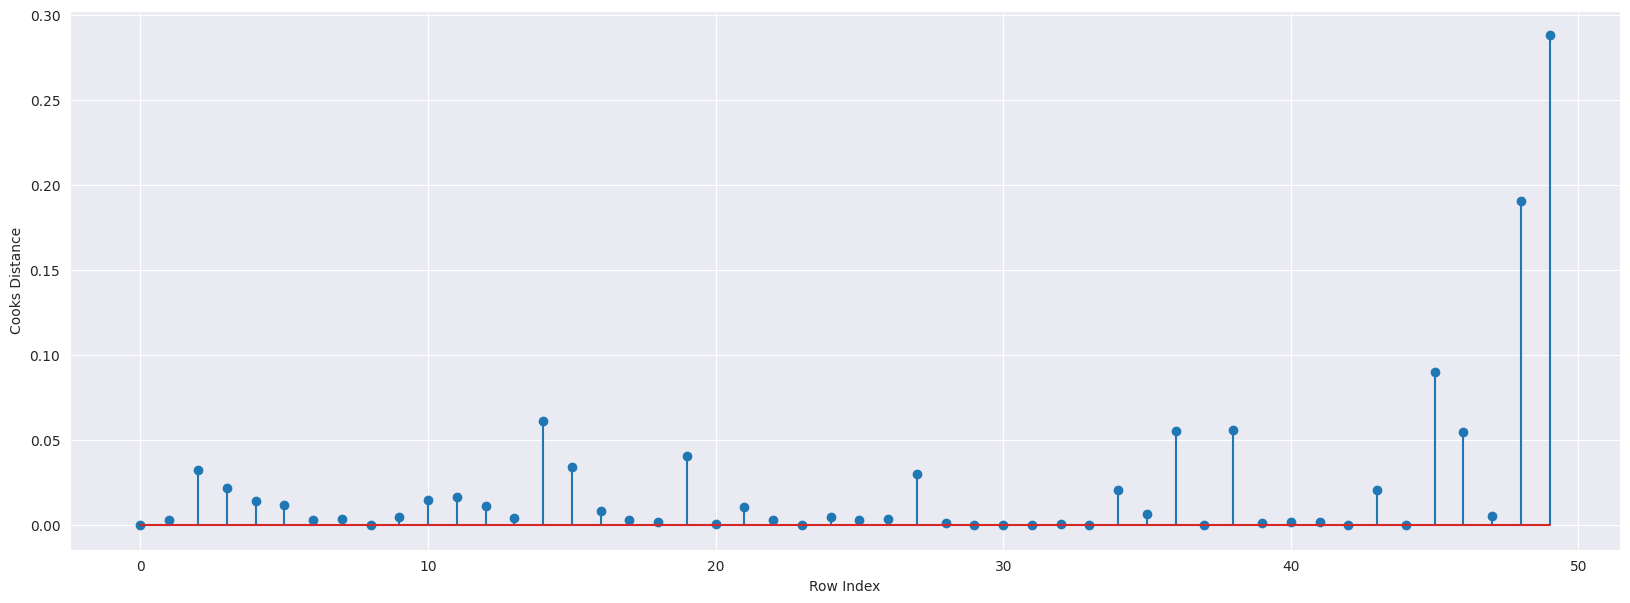

In [ ]:
# plot the influencers using the stem plot
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)), np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show

In [ ]:
# Index and value of influencer where c>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

## 2) High Influence plots

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

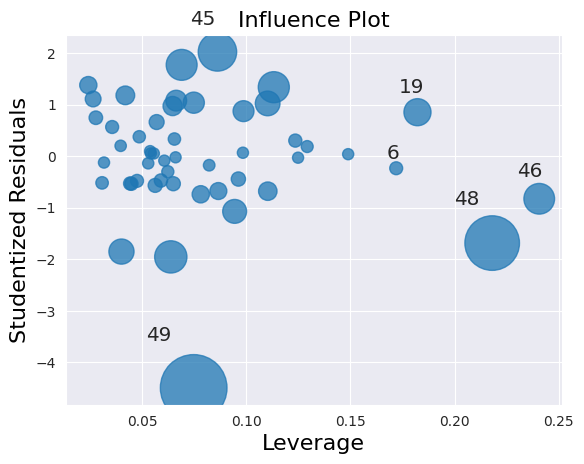

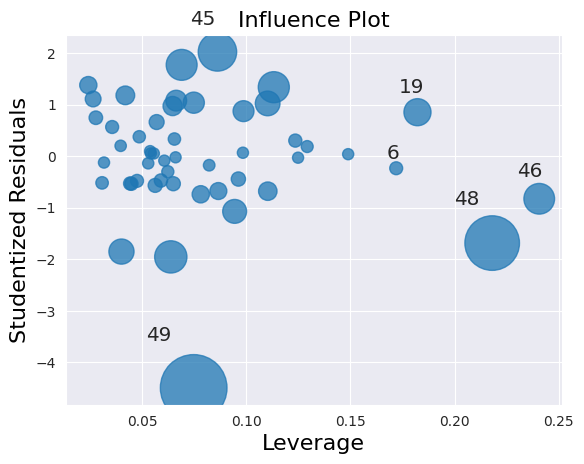

In [ ]:
influence_plot(model)

In [ ]:
# Leverage Cuttoff value = 3*(k+1)/n ; k = no.of features/columns & n = no. of data points
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [ ]:
# from the above plot , data point 49 is influencer
df[df.index.isin([49])]

,RDS,AD,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## **Improving the Model**

In [ ]:
# discard the data points which are influencers and reassign the row number (reset_index())
df1 = df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df1

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Build Model

In [ ]:
model1 = smf.ols('Profit ~ RDS+AD+MS', data=df1).fit()

In [ ]:
model1 = smf.ols('Profit~RDS+AD+MS', data=df1).fit()
(c,_) = model1.get_influence().cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

In [ ]:
np.argmax(c), np.max(c)

(48, 0.39274420556321443)

In [ ]:
df1 = df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
df1

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
final_model = smf.ols('Profit~RDS+AD+MS', data=df1).fit()
final_model.rsquared, final_model.aic
print('Thus model accuracy is improved to', final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073


## **Model Predictions**

In [ ]:
df1

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
# New data for prediction is
new_data = pd.DataFrame({'RDS':50000, 'AD':120000, 'MS':200000}, index=[0])
new_data

,RDS,AD,MS
0,50000,120000,200000


In [ ]:
# Prediction Price
final_model.predict(new_data)

0    94350.343266
dtype: float64

In [ ]:
# prediction of price with 90.02% accuracy
pred_y = final_model.predict(df1)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

## **Table with R^2 value**

In [ ]:
data2 = {'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table = pd.DataFrame(data2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.962677


In [ ]:
model.params

Intercept    50122.192990
RDS              0.805715
AD              -0.026816
MS               0.027228
dtype: float64